In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
from scipy.stats import linregress
from pprint import pprint

#
import censusdata

In [3]:
data_file = os.path.join("resources", "Decade Demographics.csv")
demog_df = pd.read_csv(data_file, thousands=',')
#demog_df.head(10)

In [11]:
#Format data frame, "or later" = 2020
demog_df = demog_df.dropna()
demog_df = demog_df.rename(columns = {"United States!!Total!!Estimate": "United States Total",
                                    "United States!!Foreign born; Entered 2010 or later!!Estimate": "Entered 2010 or later",
                                   "United States!!Foreign born; Entered 2000 to 2009!!Estimate": "Entered 2000 to 2009",
                                   "United States!!Foreign born; Entered before 2000!!Estimate": "Entered before 2000"})
demog_df = demog_df.reset_index(drop = True)

demog_df.head(50)

,Label (Grouping),United States Total,Entered 2010 or later,Entered 2000 to 2009,Entered before 2000
0,Foreign-born population,"44,932,901","11,142,149","11,035,400","22,755,352"
1,Naturalized citizen,51.6%,13.7%,47.6%,72.1%
2,Not a citizen,48.4%,86.3%,52.4%,27.9%
3,Foreign-born population excluding popu...,"44,932,799","11,142,149","11,035,400","22,755,250"
4,Europe,10.4%,8.0%,7.8%,12.8%
5,Asia,31.4%,38.8%,29.3%,28.8%
6,Africa,5.5%,9.1%,6.7%,3.2%
7,Oceania,0.7%,0.9%,0.7%,0.5%
8,Latin America,50.3%,41.5%,54.3%,52.6%
9,Northern America,1.8%,1.7%,1.2%,2.1%


In [5]:
#Get total population numbers
total_pop = demog_df.iloc[:1]

#Format data frame
total_pop = total_pop.set_index("Label (Grouping)")
total_pop = total_pop.apply(lambda x: x.str.replace(",", "").astype(int))

#Display
total_pop

,United States Total,Entered 2010 or later,Entered 2000 to 2009,Entered before 2000
Label (Grouping),,,,
Foreign-born population,44932901,11142149,11035400,22755352


In [6]:
#Get age information
immigrant_age = demog_df.iloc[12:20, :]
median_age = demog_df.iloc[21:22]

#Set index to age groupings
immigrant_age = immigrant_age.set_index("Label (Grouping)")
median_age = median_age.set_index("Label (Grouping)")

#Turn (X) to 0 (need to replace with NaN later?)
immigrant_age = immigrant_age.replace("(X)", "00")

#Remove Percentage Signs, divide by 100
for i in range (0, 4):
    
    #Remove "%"
    immigrant_age.iloc[:, i] = list(map(lambda x: x[:-1], immigrant_age.iloc[:, i].values))
    
    #Convert to float
    immigrant_age.iloc[:, i] = list(map(lambda x: float(x), immigrant_age.iloc[:, i].values))
    
    #Divide by 100
    immigrant_age.iloc[:, i] = list(map(lambda x: x / 100, immigrant_age.iloc[:, i].values))

#Convert to actual population numbers, round to the nearest whole person
imm_age_numbers = round(immigrant_age.multiply(total_pop.iloc[0], axis='columns')).astype(int)

imm_age_numbers

,United States Total,Entered 2010 or later,Entered 2000 to 2009,Entered before 2000
Label (Grouping),,,,
Under 5 years,314530,300838,0,0
5 to 17 years,2246645,1715891,529699,0
18 to 24 years,2830773,1493048,1070434,273064
25 to 44 years,16400509,5403942,5837727,5165465
45 to 54 years,8806849,1091931,2019478,5666083
55 to 64 years,6829801,590534,938009,5301997
65 to 74 years,4358491,356549,408310,3595346
75 to 84 years,2246645,144848,187602,1934205


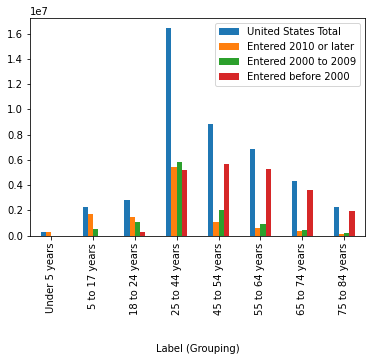

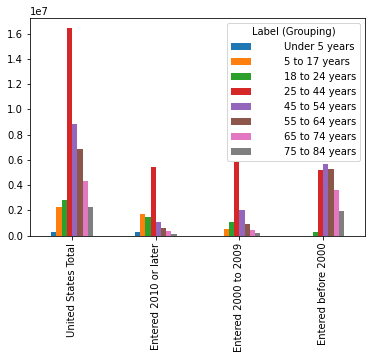

In [7]:
imm_age_transp = imm_age_numbers.transpose()

imm_age_numbers.plot.bar();

imm_age_transp.plot.bar();

In [8]:
data_file2 = os.path.join("resources", "Annual Perm Resident 1820-2019.csv")
ann_perm_res = pd.read_csv(data_file2)
ann_perm_res = ann_perm_res.drop(columns = ann_perm_res.columns[0])
ann_perm_res.tail(20)

,Year,Number of Legal Permanent Residents
180,2000,"841,002"
181,2001,"1,058,902"
182,2002,"1,059,356"
183,2003,"703,542"
184,2004,"957,883"
185,2005,"1,122,257"
186,2006,"1,266,129"
187,2007,"1,052,415"
188,2008,"1,107,126"
189,2009,"1,130,818"


In [9]:
#Fiscal year 2021, Q4 / furthest right, fiscal ytd

data_file3 = os.path.join("resources", "Form type Status.csv")
form_type = pd.read_csv(data_file3)
form_type = form_type.iloc[1: , 1: ]

form_type.head(20)

,Category and Form Number,Description,Forms,Unnamed: 4,Completed,Unnamed: 6,Unnamed: 7,Processing,Forms.1,Unnamed: 10,Completed.1,Unnamed: 12,Unnamed: 13
1,NaN,NaN,Received,Approved,Denied,Total 15,NaN,Time,Received,Approved,Denied,Total 15,NaN
2,TOTAL - ALL FORMS,NaN,"2,343,364","1,905,587","251,700","2,176,453","8,037,262",NaN,"8,839,722","6,138,783","808,323","7,010,652","8,037,262"
3,Family Based,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,I-129F,Petition for Alien Fiancé(e),"10,965","6,284","2,265","8,549","30,408",8.0,"37,741","24,445","6,639","31,084","30,408"
5,I-130,Petition for Alien Relative,"216,241","153,184","16,445","169,629","1,519,906",10.8,"757,206","673,956","81,169","755,125","1,519,906"
6,I-600 1,Petition to Classify Orphan as an Immediate Re...,309,320,49,369,531,NaN,"1,131","1,233",203,"1,436",531
7,I-601A,Application for Provisional Unlawful Presence ...,"10,876","2,768",351,"3,119","91,796",20.7,"45,344","18,324","1,724","20,048","91,796"
8,I-751,Petition to Remove Conditions on Residence,"46,669","33,440","1,716","35,156","232,803",14.8,"178,060","155,938","6,691","162,629","232,803"
9,I-800 2,Petition to Classify Convention Adoptee as an ...,656,710,17,727,444,NaN,"2,369","3,102",74,"3,176",444
10,Employment Based,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
data_file4 = os.path.join("resources", "Lawful Permanent Status.csv")
perm_status = pd.read_csv(data_file4)
perm_status = perm_status.iloc[1: , 1: ]

perm_status.head(10)

,Type and class of admission,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020
1,Total,"1,062,040","1,031,631","990,553","1,016,518","1,051,031","1,183,505","1,127,167","1,096,611","1,031,765","707,362"
2,Immediate relatives of U.S. citizens,"453,158","478,780","439,460","416,456","465,068","566,706","516,508","478,961","505,765","321,148"
3,Spouses,"258,320","273,429","248,332","238,852","265,367","304,358","292,909","268,149","304,334","195,718"
4,Children1,"80,311","81,121","71,382","61,217","66,740","88,494","74,989","66,794","61,303","37,379"
5,Parents,"114,527","124,230","119,746","116,387","132,961","173,854","148,610","144,018","140,128","88,051"
6,Family-sponsored preferences,"234,931","202,019","210,303","229,104","213,910","238,087","232,238","216,563","204,139","121,560"
7,First: Unmarried sons/daughters of U.S. citize...,"27,299","20,660","24,358","25,686","24,533","22,072","26,219","27,251","24,497","11,383"
8,"Second: Spouses, children, and unmarried sons/...","108,618","99,709","99,115","105,641","104,892","121,267","113,500","109,841","93,398","51,701"
9,Third: Married sons/daughters of U.S. citizens...,"27,704","21,752","21,294","25,830","24,271","27,392","23,260","19,531","25,213","13,930"
10,Fourth: Brothers/sisters of U.S. citizens (at ...,"71,310","59,898","65,536","71,947","60,214","67,356","69,259","59,940","61,031","44,546"


In [10]:
data_file5 = os.path.join("resources", "Refugee Admissions.csv")
refugee_admit = pd.read_csv(data_file5)

refugee_admit.head(20)

,Year,Annual Ceiling,Number of Admitted Refugees
0,1975,-,"146,158"
1,1976,-,"27,206"
2,1977,-,"19,946"
3,1978,-,"36,507"
4,1979,-,"111,363"
5,1980,"231,700","207,116"
6,1981,"217,000","159,252"
7,1982,"140,000","98,096"
8,1983,"90,000","61,218"
9,1984,"72,000","70,393"


In [11]:
src = "sf1"
year = 2019 #years work only <= 2019 for acs



#sample = censusdata.search(src, year,'concept', 'immigration')
sample = censusdata.search("acs5", year, 'concept', 'foreign')

In [14]:
data_file6 = os.path.join("resources", "2019-asec-tables-nativity-tab5.csv")
asec_2019 = pd.read_csv(data_file6)

asec_2019.head(30)

,"Table with row headers in column A, and column headers in rows 4 through 6. Leading dots indicate subparts",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,Table 1.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Educational Attainment of the Population 25 Ye...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Sex and educational attainment1,Total,NaN,Nativity and U.S. citizenship status,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Native,NaN,Naturalized U.S. citizen,NaN,Not a U.S. citizen,NaN
4,NaN,Number,Percent,Number,Percent,Number,Percent,Number,Percent
5,Both sexes,"221,478",100.0,"181,283",100.0,"20,751",100.0,"19,444",100.0
6,.Less than 9th grade,"8,603",3.9,"2,767",1.5,"1,856",8.9,"3,980",20.5
7,.9th to 12th grade (no diploma),"13,372",6.0,"9,420",5.2,"1,427",6.9,"2,525",13.0
8,.High school graduate,"62,259",28.1,"52,024",28.7,"5,263",25.4,"4,972",25.6
9,.Some college or associate's degree,"57,428",25.9,"51,183",28.2,"4,040",19.5,"2,205",11.3
